# Predicting Heart Disease using Machine Learning
This is a dataset downloaded from Kaggle and it is re-processed dataset that was cross-checked with the original data **https://archive.ics.uci.edu/ml/datasets/Heart+Disease**

Target: Achieve 95% accuracy in predicting heart disease


Following is the list of the columns and their meanings:

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
   anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
    can range from mild symptoms to severe problems
    signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
    Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
    * looks at stress of heart during exercise
    * unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downsloping: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df_og = pd.read_csv('heart-disease.csv')

In [3]:
df = df_og.copy()

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

This dataset does not contain any missing values, hence we can proceed ahead for EDA

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df['target'].value_counts(normalize = True)

1    0.544554
0    0.455446
Name: target, dtype: float64

This shows that data is unbiased, hence we can train our model on this data.

### Let's do some more Exploratory data analysis(EDA) to understand this dataset.

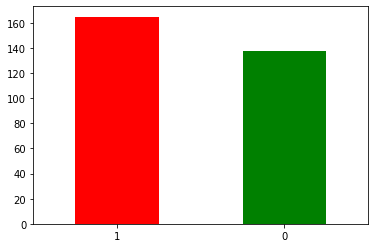

In [9]:
df['target'].value_counts().plot(color = ['Red','Green'],kind='bar')

plt.xticks(rotation=(0));

Let us try to visualize Target with reference to sex and try to deduce some rough estimation on it.

## **Target variable vs Sex**

In [10]:

df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df['target'],df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


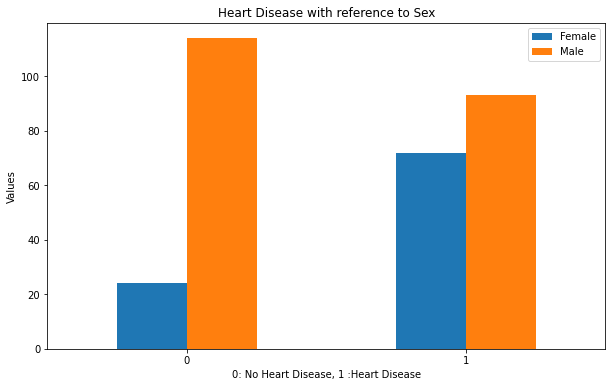

In [12]:
pd.crosstab(df['target'],df['sex']).plot(kind='bar',figsize =(10,6))

plt.title('Heart Disease with reference to Sex')
plt.xlabel('0: No Heart Disease, 1 :Heart Disease')
plt.ylabel('Values')
plt.xticks(rotation=(0))
plt.legend(["Female","Male"]);

This dataset shows that heart disease and gender has a strong correlation.

We can see that Females have more frequency of having a heart disease, whereas in males it is lesser when compared to females.


## **Target variable vs Thalach (Max Heart Rate)**

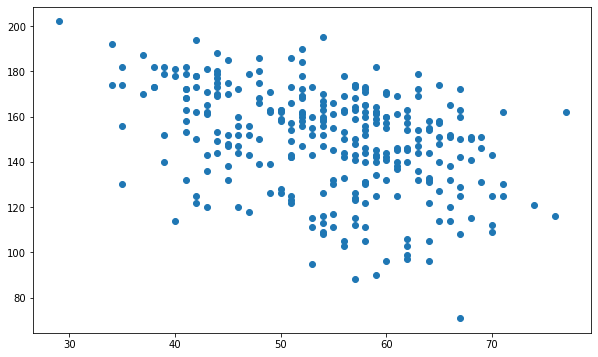

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(df['age'],df['thalach']);

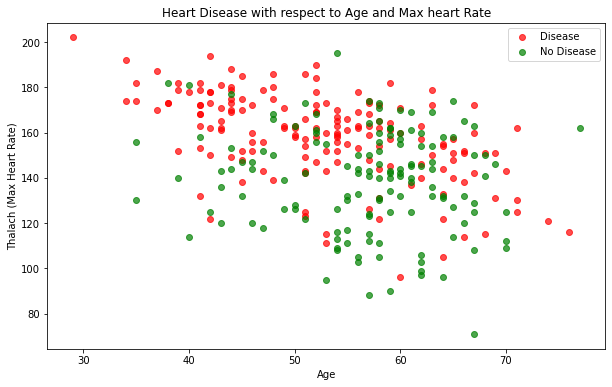

In [14]:
plt.figure(figsize=(10,6))

plt.scatter(df['age'][df['target']==1],df['thalach'][df['target']==1],c ='red',alpha=0.7);

plt.scatter(df['age'][df['target']==0],df['thalach'][df['target']==0],c ='green',alpha=0.7);

#lets add attributes

plt.title("Heart Disease with respect to Age and Max heart Rate")
plt.xlabel('Age')
plt.ylabel('Thalach (Max Heart Rate)')
plt.legend(['Disease','No Disease'])
plt.show()


Scatter plot shows a certain correlation as the person with higher heart rate has more tendency to develop a heart disease


## **Target variable vs Cholesterol**

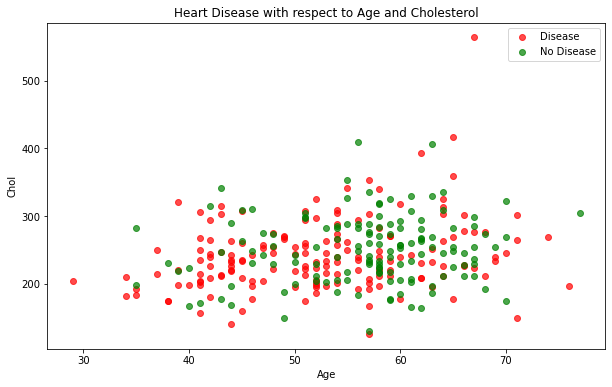

In [15]:
plt.figure(figsize=(10,6))

plt.scatter(df['age'][df['target']==1],df['chol'][df['target']==1],c ='red',alpha=0.7);

plt.scatter(df['age'][df['target']==0],df['chol'][df['target']==0],c ='green',alpha=0.7);

#lets add attributes

plt.title("Heart Disease with respect to Age and Cholesterol")
plt.xlabel('Age')
plt.ylabel('Chol')
plt.legend(['Disease','No Disease'])
plt.show()

This plot shows that the younger people with more cholesterol values above 200 are more prone to Heart disease

The above scatter plots show that the age group values are more concentrated around 60, let's plot the distribution to confirm this.

<AxesSubplot:xlabel='age', ylabel='Count'>

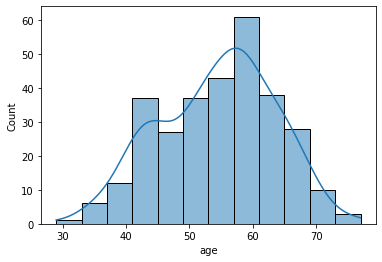

In [16]:
sns.histplot(data=df,x='age',kde=True)

The **age** distribution looks like a normal distribution but it is very slightly left-skewed

## **Target variable vs Chest pain**

<AxesSubplot:xlabel='cp', ylabel='count'>

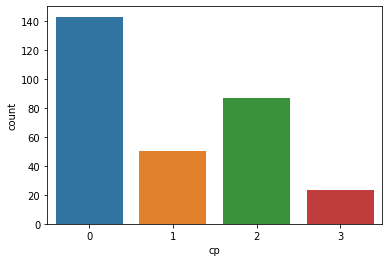

In [17]:
sns.countplot(data=df,x ='cp')

In [18]:
pd.crosstab(df['target'],df['cp'])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


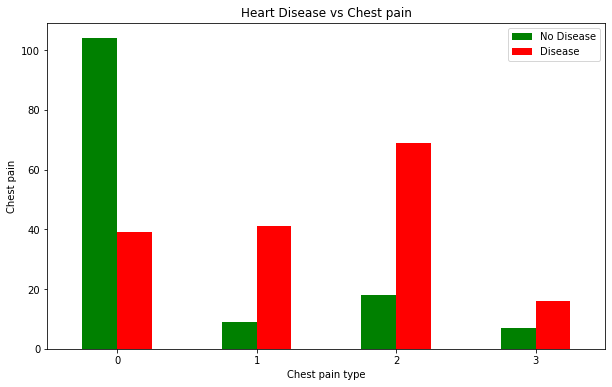

In [19]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar',
                                       figsize=(10,6),
                                       color=('Green','Red'))


plt.title('Heart Disease vs Chest pain')
plt.xlabel('Chest pain type')
plt.ylabel('Chest pain')
plt.xticks(rotation=(0))
plt.legend(['No Disease','Disease'])
plt.show()

The above plot shows us a valuable information but again at the same time it creates a confusion.

As per the column dictionary, chest pain type 1 and 2 are not related to heart but still the plot shows that this pain contributes to the majority of heart disease. We need to study more on this or discuss with a Subject matter expert to understand this.


## CORRELATION MATRIX

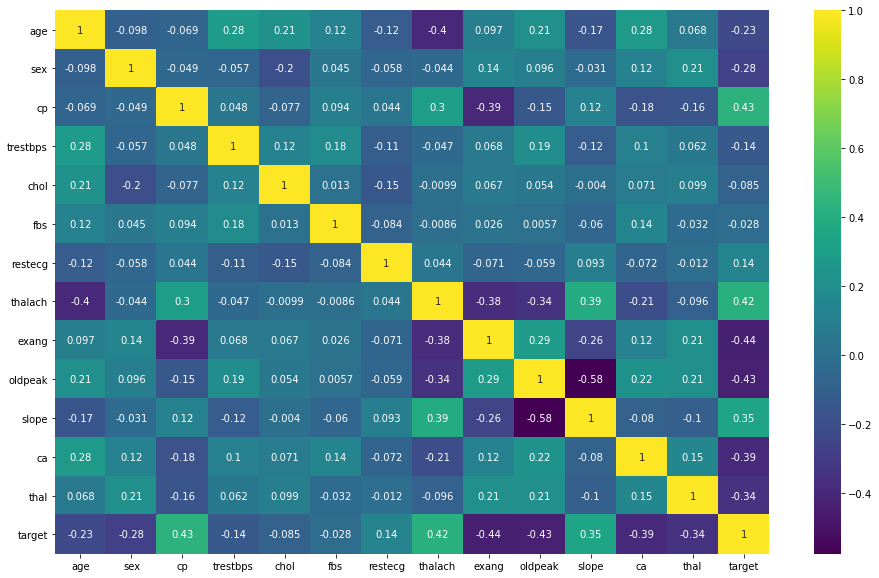

In [20]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True,cmap='viridis');

This matrix shows the correlation of the independent variables with the target variables.

* But one point to note is the correlation of independent variables within themselves.
* Generally, a value above **+-0.75** is considered to be highly correlated and it can lead to multicollinearity issue.
* In our case, max value within independent variables looks around **-0.58**

Let us calculate the Variance Inflation factor (VIF) to check for correlation among independent variables

In [21]:
X = df.drop(['target'],axis=1)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [24]:
vif_data

,feature,VIF
0,age,38.998305
1,sex,3.523211
2,cp,2.414403
3,trestbps,58.557335
4,chol,26.267365
5,fbs,1.268205
6,restecg,2.058206
7,thalach,42.742178
8,exang,2.022527
9,oldpeak,3.062890


* VIF values above 5 are considered to be highly correlated.
* In our case, we need more information from the Subject Matter Expert to reduce this VIF values.

But this more information is not available and CORRELATION Matrix values are below 0.75, we can move ahead to model building.


## MODEL BUILDING

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
categorical_columns = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
continuous_columns = ['age','trestbps','chol','thalach','oldpeak']

In [27]:
df_ml = df.copy()

In [28]:
df_ml.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
df_ml.rename(columns={'cp':'chest_pain','trestbps':'resting_blood_pressure','chol':'cholesterol','fbs':'fasting_blood_sugar',
                     'thalach':'max_heart_rate','exang':'exercise_induced_angina','oldpeak':'ST_depression',
                     'ca':'num_of_vessels','thal':'thalium_stress'},inplace=True)

In [30]:
pd.options.mode.chained_assignment = None

In [31]:
df_ml['sex'][df_ml['sex'] == 0] = 'female'
df_ml['sex'][df_ml['sex'] == 1] = 'male'

df_ml['chest_pain'][df_ml['chest_pain'] == 0] = 'typical angina'
df_ml['chest_pain'][df_ml['chest_pain'] == 1] = 'atypical angina'
df_ml['chest_pain'][df_ml['chest_pain'] == 2] = 'non-anginal pain'
df_ml['chest_pain'][df_ml['chest_pain'] == 3] = 'asymptomatic'

df_ml['fasting_blood_sugar'][df_ml['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df_ml['fasting_blood_sugar'][df_ml['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df_ml['restecg'][df_ml['restecg'] == 0] = 'normal'
df_ml['restecg'][df_ml['restecg'] == 1] = 'ST-T wave abnormality'
df_ml['restecg'][df_ml['restecg'] == 2] = 'left ventricular hypertrophy'

df_ml['exercise_induced_angina'][df_ml['exercise_induced_angina'] == 0] = 'no'
df_ml['exercise_induced_angina'][df_ml['exercise_induced_angina'] == 1] = 'yes'

df_ml['slope'][df_ml['slope'] == 1] = 'upsloping'
df_ml['slope'][df_ml['slope'] == 2] = 'flat'
df_ml['slope'][df_ml['slope'] == 3] = 'downsloping'

df_ml['thalium_stress'][df_ml['thalium_stress'] == 1] = 'normal'
df_ml['thalium_stress'][df_ml['thalium_stress'] == 2] = 'fixed defect'
df_ml['thalium_stress'][df_ml['thalium_stress'] == 3] = 'reversable defect'

In [32]:
df_ml['chest_pain'] = df_ml['chest_pain'].astype("category")
df_ml['exercise_induced_angina'] = df_ml['exercise_induced_angina'].astype("category")
df_ml['fasting_blood_sugar']= df_ml['fasting_blood_sugar'].astype("category")
df_ml['restecg'] = df_ml['restecg'].astype("category")
df_ml['sex'] = df_ml['sex'].astype("category")
df_ml['slope'] = df_ml['slope'].astype("category")
df_ml['thalium_stress'] = df_ml['thalium_stress'].astype("category")


In [33]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   age                      303 non-null    int64   
 1   sex                      303 non-null    category
 2   chest_pain               303 non-null    category
 3   resting_blood_pressure   303 non-null    int64   
 4   cholesterol              303 non-null    int64   
 5   fasting_blood_sugar      303 non-null    category
 6   restecg                  303 non-null    category
 7   max_heart_rate           303 non-null    int64   
 8   exercise_induced_angina  303 non-null    category
 9   ST_depression            303 non-null    float64 
 10  slope                    303 non-null    category
 11  num_of_vessels           303 non-null    int64   
 12  thalium_stress           303 non-null    category
 13  target                   303 non-null    int64   
dtypes: categor

In [34]:
df_ml = pd.get_dummies(data=df_ml,drop_first=True)

In [35]:
df_ml

,age,resting_blood_pressure,cholesterol,max_heart_rate,ST_depression,num_of_vessels,target,sex_male,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,fasting_blood_sugar_lower than 120mg/ml,restecg_left ventricular hypertrophy,restecg_normal,exercise_induced_angina_yes,slope_flat,slope_upsloping,thalium_stress_fixed defect,thalium_stress_normal,thalium_stress_reversable defect
0,63,145,233,150,2.3,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1
299,45,110,264,132,1.2,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1
300,68,144,193,141,3.4,2,0,1,0,0,1,0,0,0,0,0,1,0,0,1
301,57,130,131,115,1.2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,1


In [36]:
X = df_ml.drop(['target'],axis=1)
y = df['target']

In [37]:
X.shape,y.shape

((303, 19), (303,))

* We will split the data into Training data and Test data.
* Data involves columns where **['oldpeak']** ranges between 0-10 and **['chol']** ranges even above 200, so it's better to scale our data.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [40]:
scaler = StandardScaler()

In [41]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Model selection options:

From the data, we can try for following models:-
* **Logistic Regression**
* **KNN classifier**
* **Random Forest classifier**

We will try to run these models on default parameters and compare the model scores.

Later we will choose one of the model and try to hypertune it to achieve its maximum score.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
models = {'log_model':LogisticRegression(),
               'knn':KNeighborsClassifier(),
               'rfc':RandomForestClassifier()
         }

In [44]:
#define a function which can take in the parameters and show us the model_scores

def fit_score(models,X_train,y_train,X_test,y_test):
    '''
    Fits and evaluates scores for the model
    '''
    np.random.seed(42)
    model_scores={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [45]:
model_scores = fit_score(models =models,
                        X_train = scaled_X_train,
                        y_train = y_train,
                        X_test = scaled_X_test,
                        y_test = y_test)

model_scores

{'log_model': 0.8241758241758241,
 'knn': 0.7692307692307693,
 'rfc': 0.8131868131868132}

## MODEL COMPARISON

In [46]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

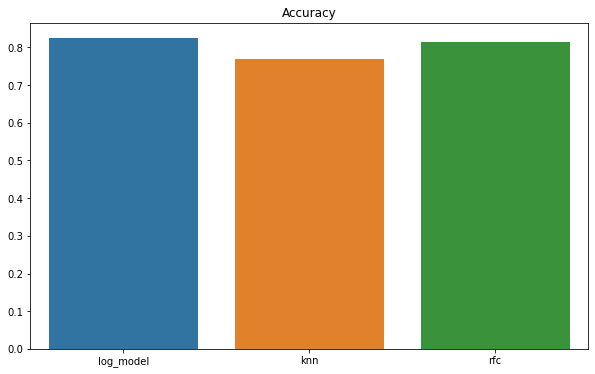

In [47]:
plt.figure(figsize=(10,6))

sns.barplot(data=model_compare)
plt.title('Accuracy');

In [48]:
from sklearn.metrics import plot_confusion_matrix

In [49]:
def plot_matrix(models,X_test,y_test):
    for name,model in models.items():
        plot_confusion_matrix(model,X_test,y_test)

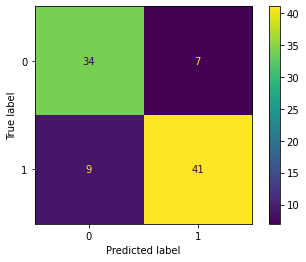

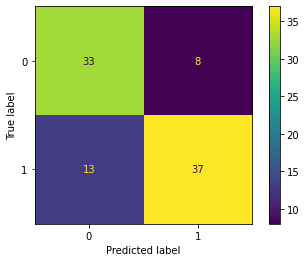

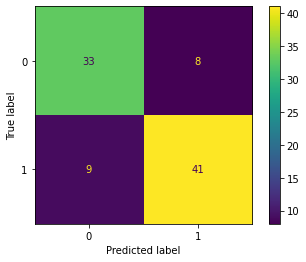

In [50]:
plot_matrix(models=models, X_test=scaled_X_test,y_test=y_test)

## Hyperparameter Tuning and Cross Validation

## * Tune hyperparameters for **KNN** classifier

In [51]:
train_scores = []
test_scores = []

neighbors = range(1,21)

In [52]:
knn = KNeighborsClassifier()   

In [53]:
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(scaled_X_train,y_train)
    train_scores.append(knn.score(scaled_X_train,y_train))
    test_scores.append(knn.score(scaled_X_test,y_test))

Let's plot the scores to visualize

Maximum score for test data : 84.62%


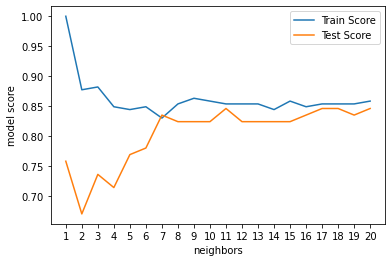

In [54]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label ='Test Score')

plt.xticks(np.arange(1,21,1))
plt.ylabel('model score')
plt.xlabel('neighbors')
plt.legend()
print(f"Maximum score for test data : {max(test_scores)*100:.2f}%")

we are getting the maximum score of 84.62% , we can further use hypertuning to improve this

In [55]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [56]:

grid_params = { 'n_neighbors' : np.arange(7,14,1),
               'leaf_size':[5,10,20,30,50],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']
               }

In [57]:
knn_2 = KNeighborsClassifier()

In [58]:
grid_model_knn = GridSearchCV(knn_2,param_grid=grid_params,cv=10,verbose=1,scoring='accuracy')

In [59]:
np.random.seed(42)

knn_grid_model = grid_model_knn.fit(scaled_X_train,y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


In [60]:
knn_grid_model.best_estimator_.get_params()

{'algorithm': 'auto',
 'leaf_size': 5,
 'metric': 'manhattan',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 13,
 'p': 2,
 'weights': 'distance'}

In [61]:
knn_grid_model.best_score_

0.8437229437229437

In [62]:
knn_grid_model.score(scaled_X_test, y_test)

0.8571428571428571

We observe that the score we get after hypertuning is 0.8571, so we should try to use other algorithms

## Logistic Regression

In [63]:
log_reg_grid_params = {'C':np.logspace(-4,4,20),
                       'solver':['liblinear']
                        }

In [64]:
np.random.seed(42)

log_reg_randomsearch = RandomizedSearchCV(estimator =LogisticRegression(),
                                     param_distributions =log_reg_grid_params,
                                     n_iter=10,
                                     cv=5,
                                     verbose=True)

log_reg_randomsearch.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [65]:
log_reg_randomsearch.best_params_

{'solver': 'liblinear', 'C': 0.012742749857031334}

In [66]:
log_reg_randomsearch.score(scaled_X_test,y_test)

0.8571428571428571

This shows improvement from our earlier regular Logistic regression score.

From 81.31 to 85.71

In [67]:
np.random.seed(42)

log_reg_gridsearch = GridSearchCV(estimator =LogisticRegression(),
                                 param_grid=log_reg_grid_params,
                                 cv=5,verbose=True)

log_reg_gridsearch.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [68]:
log_reg_gridsearch.best_params_

{'C': 0.08858667904100823, 'solver': 'liblinear'}

In [69]:
log_reg_gridsearch.score(scaled_X_test,y_test)

0.8351648351648352

## Random Forest Classifier

In [70]:
rfc_params = {'n_estimators': np.arange(10,1000,50),
              'max_depth':[None,3,5,10],
              'min_samples_split': np.arange(2, 20, 2),
              'min_samples_leaf': np.arange(1, 20, 2)
              }

In [71]:
np.random.seed(42)

rfc_randomsearch = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rfc_params,
                             cv = 5,n_iter=10,
                             verbose=1)

rfc_randomsearch.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=1)

In [72]:
rfc_randomsearch.best_params_

{'n_estimators': 610,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [73]:
rfc_params_2 = {'n_estimators': [610],
              'max_depth':[3,5,10],
              'min_samples_split': [5,10,15],
              'min_samples_leaf': [7,9,11,15]
              }

In [74]:
np.random.seed(42)

rfc_gridsearch = GridSearchCV(RandomForestClassifier(), param_grid=rfc_params_2,
                             cv = 5,
                             verbose=1)

rfc_gridsearch.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 10],
                         'min_samples_leaf': [7, 9, 11, 15],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [610]},
             verbose=1)

In [75]:
rfc_gridsearch.best_params_

{'max_depth': 3,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'n_estimators': 610}

In [76]:
rfc_gridsearch.score(scaled_X_test,y_test)

0.8461538461538461

## XGBOOST

In [77]:
import xgboost as xgb

In [78]:
xgb_clf = xgb.XGBClassifier()

In [79]:
xgb_params =  {
    'n_estimators': range(1,20),
    'learning_rate': [0.1,0.4, 0.45, 0.5, 0.55, 0.6],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1],
    'booster':["gbtree"],
    'min_child_weight': [0.001,0.003,0.01]
}

In [80]:
np.random.seed(42)

xgb_randomsearch = RandomizedSearchCV(param_distributions=xgb_params, 
                                    estimator = xgb_clf, scoring = "accuracy", 
                                    verbose = 0, n_iter = 20, cv = 5)

xgb_randomsearch.fit(scaled_X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_bin=None,...
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=

In [81]:
xgb_randomsearch.best_params_

{'n_estimators': 12,
 'min_child_weight': 0.01,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [82]:
xgb_randomsearch.score(scaled_X_test,y_test)

0.8131868131868132

Let us compare the model scores visually to see what kind of values we get after hypertuning

## Visualizing model comparison

In [83]:
model_scores

{'log_model': 0.8241758241758241,
 'knn': 0.7692307692307693,
 'rfc': 0.8131868131868132}

In [84]:
model_compare_dictionary = {}

model_compare_hypertuning = {'knn_grid_model':knn_grid_model.score(scaled_X_test, y_test),
                            'log_reg_gridsearch':log_reg_gridsearch.score(scaled_X_test,y_test),
                            'rfc_gridsearch':rfc_gridsearch.score(scaled_X_test,y_test),
                            'xgb_randomsearch':xgb_randomsearch.score(scaled_X_test,y_test)}
model_compare_dictionary.update(model_scores)
model_compare_dictionary.update(model_compare_hypertuning)



In [85]:
model_names = list(model_compare_dictionary.keys())
model_values = list(model_compare_dictionary.values())

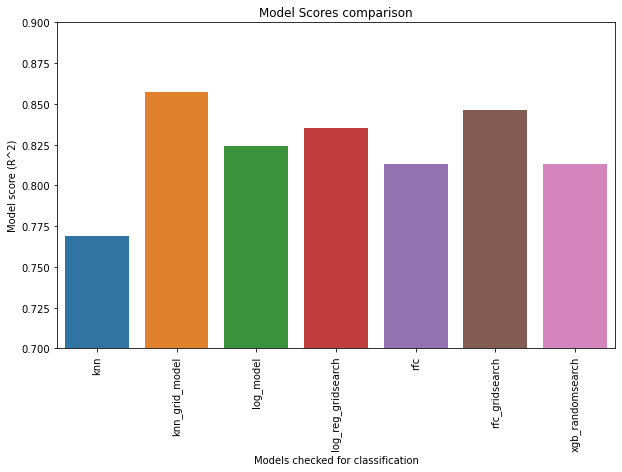

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x=model_names,y=model_values,
           order=['knn','knn_grid_model','log_model','log_reg_gridsearch','rfc','rfc_gridsearch','xgb_randomsearch'])

plt.xticks(rotation=(90))
plt.ylim(0.7,0.90)
plt.title('Model Scores comparison')
plt.xlabel('Models checked for classification')
plt.ylabel('Model score (R^2)');

We can see that the grid search models are performing better than the general models.
Hypertuning has helped the model to classify better.

* The best performing models are hypertuned KNN, Logistic Regression and Random Forest classifier.And they are performing similar.
* But still, no model could take score above 90%, which was our criteria for this project

## EVALUATION with other metrics

In [87]:
ypreds_log_reg = log_reg_gridsearch.predict(scaled_X_test)
ypreds_knn = knn_grid_model.predict(scaled_X_test)
ypreds_rfc = rfc_gridsearch.predict(scaled_X_test)

In [88]:
from sklearn.metrics import plot_roc_curve

In [89]:
def plot_roc(anymodel,X_test,y_test):
    '''
    plot roc curve for models present in a list,dic or tuple
    '''
    ax =plt.gca()
    for i in anymodel:
        fig = plot_roc_curve(i,X_test,y_test,ax=ax,name=i.estimator)
    

In [90]:
model_final = [log_reg_gridsearch,knn_grid_model,rfc_gridsearch]

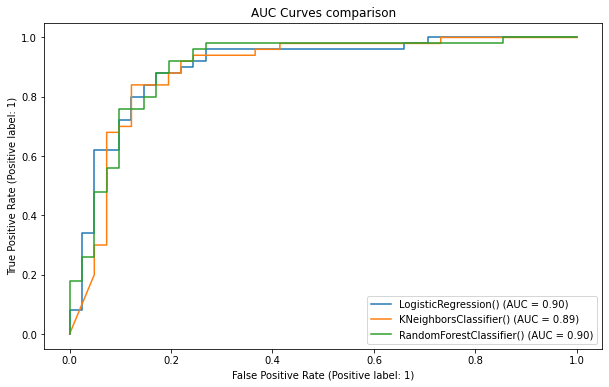

In [91]:
plt.figure(figsize=(10,6))

plot_roc(model_final,X_test=scaled_X_test,y_test=y_test)

plt.title('AUC Curves comparison');


In [92]:
from sklearn.metrics import plot_confusion_matrix,classification_report

In [93]:
def plot_conf_matrices(anymodel,X_test,y_test):
    '''
    plot confusion matrix for models
    '''
    for i in anymodel:
        plot_confusion_matrix(i,X_test,y_test)

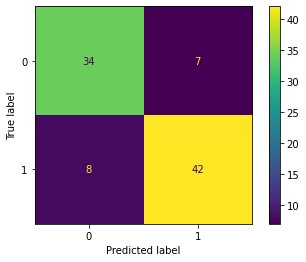

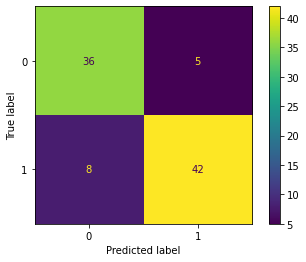

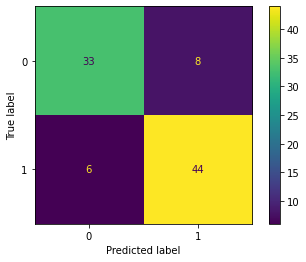

In [94]:
plot_conf_matrices(model_final,X_test=scaled_X_test,y_test=y_test)

In [95]:
ypreds_list = [ypreds_log_reg,ypreds_knn,ypreds_rfc]

In [96]:
pred_dict = {'Logistic Regression':ypreds_log_reg,
            'KNN Classifier':ypreds_knn,
            'Random Forest Classifier':ypreds_rfc}

In [97]:
for k,v in pred_dict.items():
    print(k)
    print(classification_report(y_test,v))

Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        41
           1       0.86      0.84      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

KNN Classifier
              precision    recall  f1-score   support

           0       0.82      0.88      0.85        41
           1       0.89      0.84      0.87        50

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

Random Forest Classifier
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg  

We can see that these 3 models are perfroming almost similar with nearly same f1-scores.

Let us be more certain on evaluation by evaluating all scores using cross validation.
* For cross validated score, we need to use the best performing parameters for the models

In [98]:
def best_param(model_array):
    for i in model_array:
        print(i.best_params_)

In [99]:
best_param(model_final)

{'C': 0.08858667904100823, 'solver': 'liblinear'}
{'leaf_size': 5, 'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}
{'max_depth': 3, 'min_samples_leaf': 15, 'min_samples_split': 5, 'n_estimators': 610}


In [100]:
from sklearn.model_selection import cross_val_score

In [101]:
clf_log_reg = LogisticRegression(C=0.03359818286283781,solver= 'liblinear')

In [102]:
clf_KNN = KNeighborsClassifier(leaf_size= 5, metric= 'manhattan', n_neighbors= 13, weights= 'distance')

In [103]:
clf_rfc = RandomForestClassifier(max_depth=3, min_samples_leaf= 15, min_samples_split= 5, n_estimators =610)

In [104]:
models_cross_val = {'Logistic Regression':clf_log_reg,
                    'KNN Classifier':clf_KNN,
                    'Random Forest Classifier':clf_rfc}

In [105]:
cv_metrics ={}
def cross_val_df(model):
    cv_metrics['Accuracy']=[]
    cv_metrics['Precision']=[]
    cv_metrics['Recall']=[]
    cv_metrics['F1_score']=[]
    for k,v in model.items():
        cv_accuracy = np.mean(cross_val_score(v,X,y,cv=5,scoring='accuracy'))
        cv_precision = np.mean(cross_val_score(v,X,y,cv=5,scoring='precision'))
        cv_recall = np.mean(cross_val_score(v,X,y,cv=5,scoring='recall'))
        cv_F1_score = np.mean(cross_val_score(v,X,y,cv=5,scoring='f1'))
        cv_metrics['Accuracy'].append(cv_accuracy)
        cv_metrics['Precision'].append(cv_precision)
        cv_metrics['Recall'].append(cv_recall)
        cv_metrics['F1_score'].append(cv_F1_score)
    print(cv_metrics)

In [106]:
cross_val_df(models_cross_val)

{'Accuracy': [0.8118032786885246, 0.699672131147541, 0.8381420765027323], 'Precision': [0.7974200206398349, 0.7008665808665808, 0.8164083365221885], 'Recall': [0.8787878787878787, 0.7818181818181819, 0.8727272727272728], 'F1_score': [0.8357806801875498, 0.7387419148719643, 0.845989795295606]}


In [107]:
cross_val_df = pd.DataFrame(cv_metrics,index=models_cross_val.keys(),columns=['Accuracy','Precision','Recall','F1_score'])
cross_val_df

,Accuracy,Precision,Recall,F1_score
Logistic Regression,0.811803,0.797420,0.878788,0.835781
KNN Classifier,0.699672,0.700867,0.781818,0.738742
Random Forest Classifier,0.838142,0.816408,0.872727,0.845990


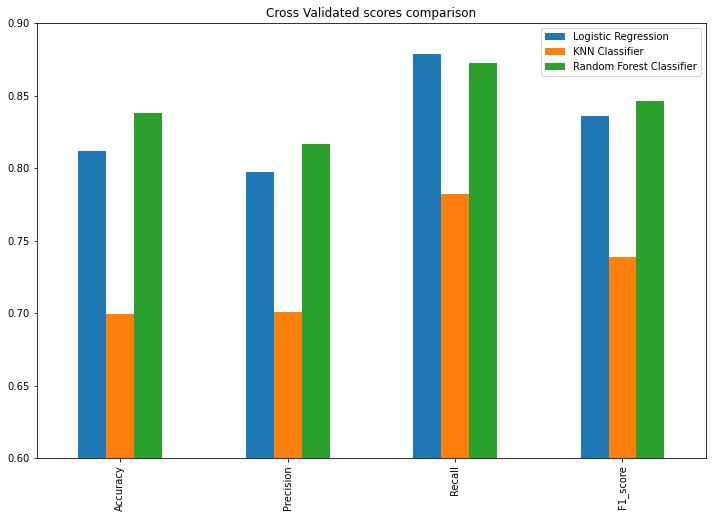

In [108]:
cross_val_df.T.plot.bar(figsize=(12,8))
plt.ylim(0.6,0.9)
plt.title('Cross Validated scores comparison');

We can see from the above graph:
* KNN classifier is the worst performing model when evaluated using cross validation metrics
* Random Forest Classifier performs slightly better than the Logistic Regression model.

## Feature Importances

Let us derive the feature importances for Logistic Regression and Random forest classifier models

In [109]:
log_reg_gridsearch.best_estimator_.coef_

array([[ 0.00100923, -0.04614284, -0.03379177,  0.20065488, -0.28642768,
        -0.65085174, -0.32467238, -0.07842413,  0.24494351, -0.42907209,
        -0.10850599, -0.13694707, -0.2203555 , -0.3930345 ,  0.25399283,
        -0.20139407,  0.32039299,  0.07841174, -0.37939211]])

In [110]:
rfc_gridsearch.best_estimator_.feature_importances_

array([0.02691848, 0.01005273, 0.0113706 , 0.07471738, 0.06995036,
       0.16714997, 0.01960011, 0.00108202, 0.02194841, 0.13271202,
       0.        , 0.        , 0.00371969, 0.10383148, 0.05066962,
       0.03557752, 0.14032815, 0.        , 0.13037145])

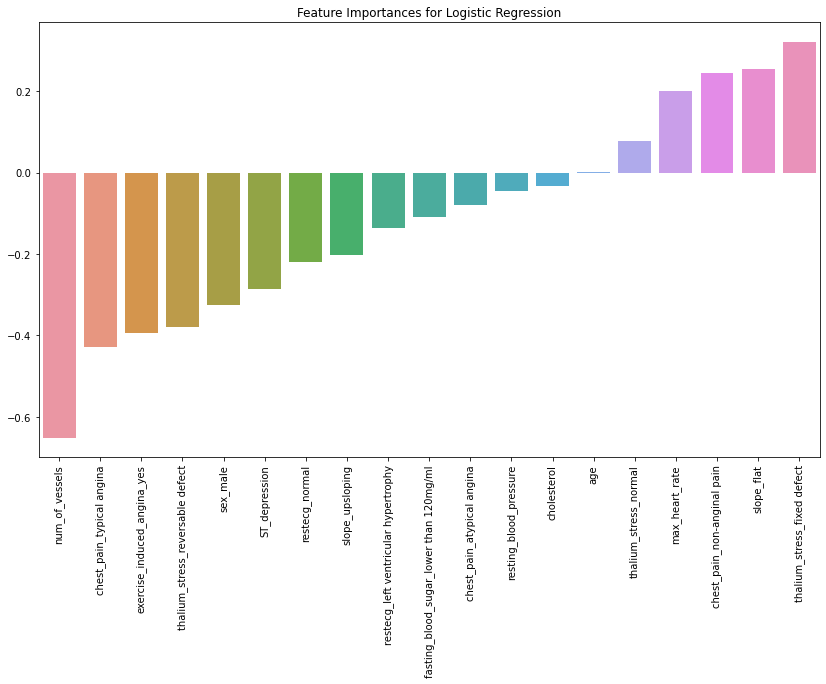

In [111]:
feat_imp = pd.Series(data=log_reg_gridsearch.best_estimator_.coef_[0],index=X.columns)
feat_imp=feat_imp.sort_values()
plt.figure(figsize=(14,8))
sns.barplot(x=feat_imp.index,y=feat_imp.values)
plt.xticks(rotation=(90))
plt.title('Feature Importances for Logistic Regression')
plt.show()

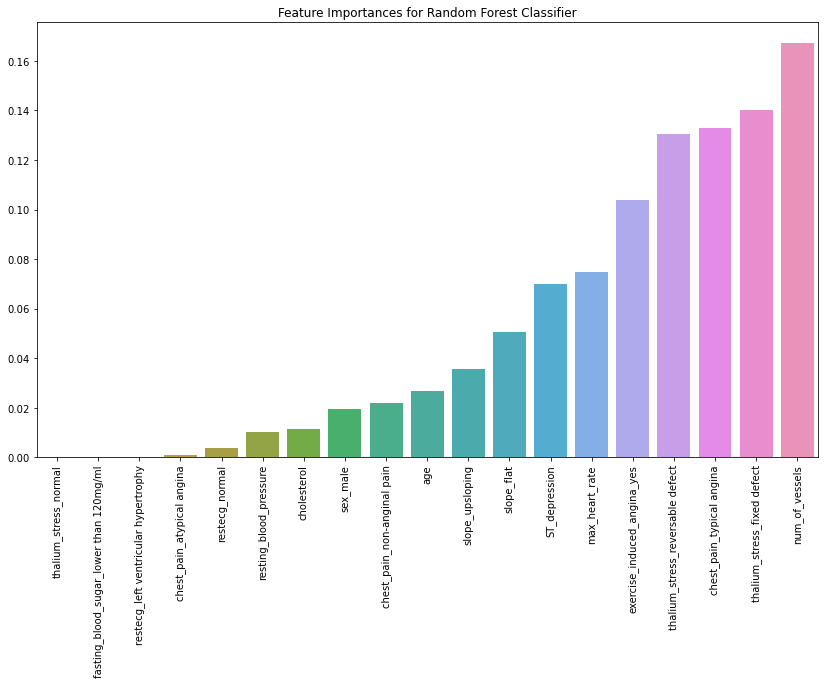

In [112]:
feat_imp2 = pd.Series(data=rfc_gridsearch.best_estimator_.feature_importances_,index=X.columns)
feat_imp2=feat_imp2.sort_values()
plt.figure(figsize=(14,8))
sns.barplot(x=feat_imp2.index,y=feat_imp2.values)
plt.xticks(rotation=(90))
plt.title('Feature Importances for Random Forest Classifier')
plt.show()

From the above feature importances, we can deduce that some features contribute more than other features, and this analysis can help in understanding which users/customers can visit again for heart disease problems.

# CONCLUSION

* We could achieve a maximum F1 score and accuracy around 84-85% with Logistic Regression and Random Forest Classifier
* However, we could not achieve our target value of 95%
* We need more data to have a better model and to get more accuracy in our model.